In [37]:
# See if the BMI code is doing what it should
# Not bad, but some oddities:
#  - probably updating more often than it needs to. it's updating every 5 minutes, but
#    history is updated every 15 minutes
# The time series peaks are clipped. As if the sample points are too close?
# 

In [38]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib notebook

In [39]:
base_run='data_salt_filling-v04_existing_impaired'
bmi_run ='data_salt_filling-v05_existing_impaired'

In [40]:
# First, compare seepage time series:
base_seep=pd.read_csv(base_run+"/seepage.tim",sep='\s+',
                     names=['minutes','flow','dsalt','dtemp'])
bmi_seep=pd.read_csv(bmi_run+"/seepage.tim",sep='\s+',
                     names=['minutes','flow','dsalt','dtemp'])

<IPython.core.display.Javascript object>


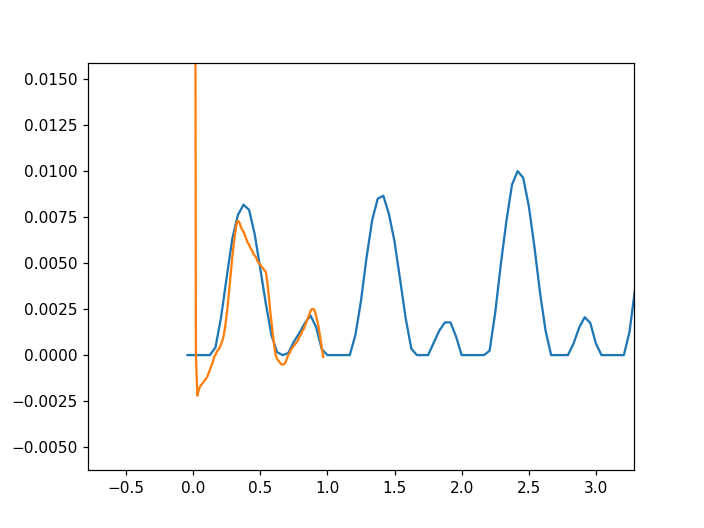

In [41]:
plt.figure()
plt.plot(base_seep.minutes/(24*60), base_seep.flow,label='base')
plt.plot(bmi_seep.minutes/(24*60), bmi_seep.flow,label='bmi')


In [25]:
his_fn=bmi_run+"/DFM_OUTPUT_flowfm/flowfm_0000_his.nc"
his_ds=xr.open_dataset(his_fn)

In [33]:
his_ds.station_name

<xarray.DataArray 'station_name' (stations: 145)>
array([b'pch_up', b'pch_down', b'lag1', b'nmc_down', b'BC3', b'ch2', b'bc1',
       b'nck', b'bbr', b'bbrch', b'pc3', b'nmp', b'nmc_up', b'mid_mouth',
       b'mouth_thalweg', b'npc', b'thalweg_pesc_0000', b'thalweg_pesc_0001',
       b'thalweg_pesc_0002', b'thalweg_pesc_0003', b'thalweg_pesc_0004',
       b'thalweg_pesc_0005', b'thalweg_pesc_0006', b'thalweg_pesc_0007',
       b'thalweg_pesc_0008', b'thalweg_pesc_0009', b'thalweg_pesc_0010',
       b'thalweg_pesc_0011', b'thalweg_pesc_0012', b'thalweg_pesc_0013',
       b'thalweg_pesc_0014', b'thalweg_pesc_0015', b'thalweg_pesc_0016',
       b'thalweg_pesc_0017', b'thalweg_pesc_0018', b'thalweg_pesc_0019',
       b'thalweg_pesc_0020', b'thalweg_pesc_0021', b'thalweg_pesc_0022',
       b'thalweg_pesc_0023', b'thalweg_pesc_0024', b'thalweg_pesc_0025',
       b'thalweg_pesc_0026', b'thalweg_pesc_0027', b'thalweg_pesc_0028',
       b'thalweg_pesc_0029', b'thalweg_pesc_0030', b'thalweg_pesc

<IPython.core.display.Javascript object>


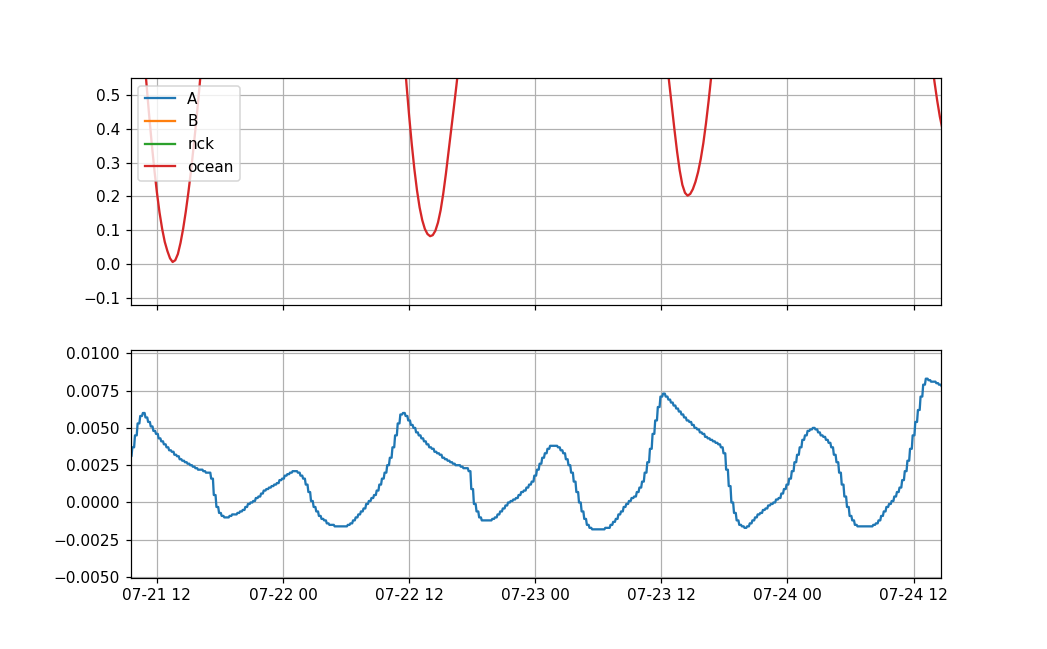

In [35]:
fig,axs=plt.subplots(2,1,sharex=True)
axs[0].plot(his_ds.time,his_ds.waterlevel.isel(stations=-2),label='A')
axs[0].plot(his_ds.time,his_ds.waterlevel.isel(stations=-1),label='B')
axs[0].plot(his_ds.time,his_ds.waterlevel.isel(stations=7),label='nck')
axs[0].plot(his_ds.time,his_ds.waterlevel.isel(stations=16),label='ocean')
axs[0].legend(loc='upper left')
axs[1].plot(his_ds.time.values[0]+bmi_seep.minutes*np.timedelta64(60,'s'),
           bmi_seep.flow)
